In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

from pathlib import Path

%reload_ext autoreload
%autoreload 2
# import var_groups, costs, build_frames, pyfiles.overview_fig
import pyfiles.var_groups as var_groups
import pyfiles.costs as costs
import pyfiles.build_frames as build_frames
import pyfiles.fig_setup as fig_setup
import pyfiles.overview_fig as overview_fig

colors = [
    "#4C72B0",  # blue
    "#55A868",  # green
    "#C44E52",  # red-ish
    "#8172B3",  # purple
    "#CCB974",  # ochre
    "#64B5CD",  # light blue
    "#8C8C8C",  # grey
    "#E17C05",  # orange
    "#76B7B2",  # teal
    "#F1CE63",  # yellow
]

source_labels = {
    Path(fname).stem: nice
    for fname, nice in var_groups.all_cases_dict.items()
}

# Code for getting usefull EnergyPlan `output`-data

The idea is to get a code that can get specific data form the *messy* EnergyPlan output. In the end, this is to be a `.py`-file, thus the notebook is for building that code.

## 1. Welfare measure

In [49]:
df = [costs.get_costs(f) for f in var_groups.shock]
all_ = pd.concat(df)

all_.to_clipboard(index=True)
all_

Case (M EUR),Import,Export,Variable costs,Fixed operation costs,Annual Investment costs,TOTAL ANNUAL COSTS
test_new_VP,0.0,0.0,994.0,4326.0,18331.0,23650.0
test_new_VP_shock,0.0,0.0,1135.0,4454.0,18236.0,23826.0


In [56]:
all = all_.rename(columns=
                   {'Import                                                 ':'Import',
                    'Export                                                 ':'Export',
                    'Variable costs                       ':'Variable cost',
                    'Fixed operation costs                ':'Fixed operation costs',
                    'Annual Investment costs              ':'Annual Investment costs',
                    'TOTAL ANNUAL COSTS                   ':'TOTAL ANNUAL COSTS',                                            
                   }.copy()
)
base_TAC = all['TOTAL ANNUAL COSTS'].iloc[0]
shock_TAC = all['TOTAL ANNUAL COSTS'].iloc[1]

print(f'i.e. an relative rise of {(shock_TAC/base_TAC -1)*100:.3f} percent\n')
print(all)

i.e. an relative rise of 0.744 percent

Case (M EUR)       Import  Export  Variable cost  Fixed operation costs  \
test_new_VP           0.0     0.0          994.0                 4326.0   
test_new_VP_shock     0.0     0.0         1135.0                 4454.0   

Case (M EUR)       Annual Investment costs  TOTAL ANNUAL COSTS  
test_new_VP                        18331.0             23650.0  
test_new_VP_shock                  18236.0             23826.0  


## 2. Timeseries by month

In [25]:
# 1. build df (monthly)
dfs_months_1 = [build_frames.timeseries_months(f) for f in var_groups.refs]

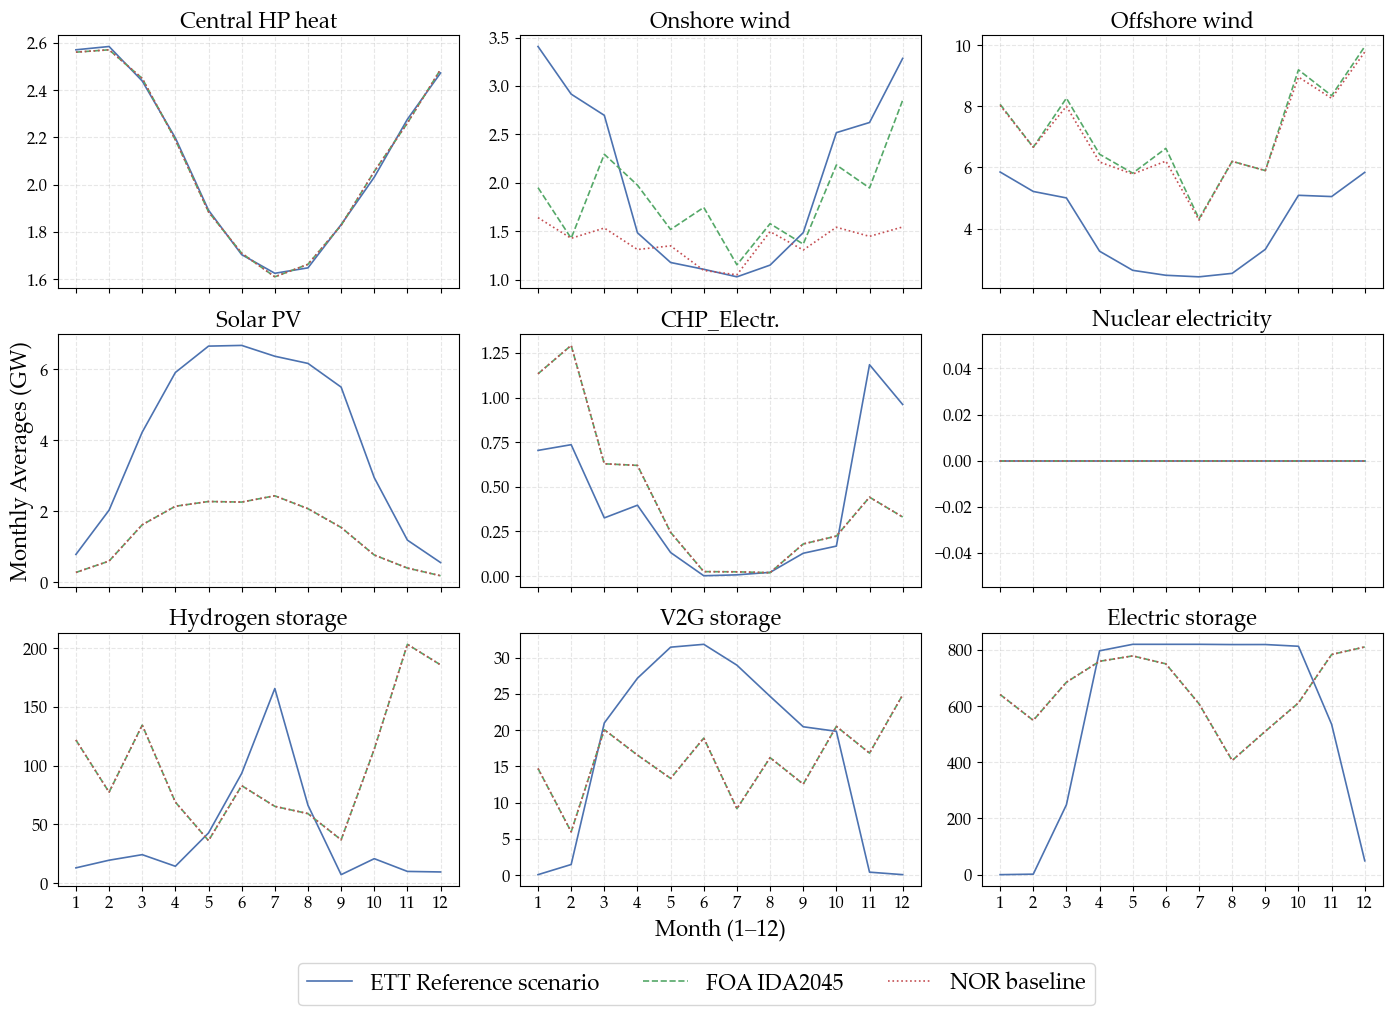

(<Figure size 1400x1000 with 9 Axes>,
 array([<Axes: title={'center': 'Central HP heat'}>,
        <Axes: title={'center': 'Onshore wind'}>,
        <Axes: title={'center': 'Offshore wind'}>,
        <Axes: title={'center': 'Solar PV'}, ylabel='Monthly Averages (GW)'>,
        <Axes: title={'center': 'CHP_Electr.'}>,
        <Axes: title={'center': 'Nuclear electricity'}>,
        <Axes: title={'center': 'Hydrogen storage'}>,
        <Axes: title={'center': 'V2G storage'}, xlabel='Month (1–12)'>,
        <Axes: title={'center': 'Electric storage'}>], dtype=object))

In [26]:
# 2. plot
overview_fig.plot_metrics_months_grid(
    dfs=dfs_months_1,
    plots=var_groups.core_vars,
    case_labels=source_labels,
    tech_labels=var_groups.tech_labels,
    colors=colors,
    nrows=3,
    ncols=3,
    savepath="0_figs/fig1.pdf",  
    dpi=300,
    show=True,
)

In [27]:
# 1. build df (monthly)
dfs_months_2 = [build_frames.timeseries_months(f) for f in var_groups.shock]

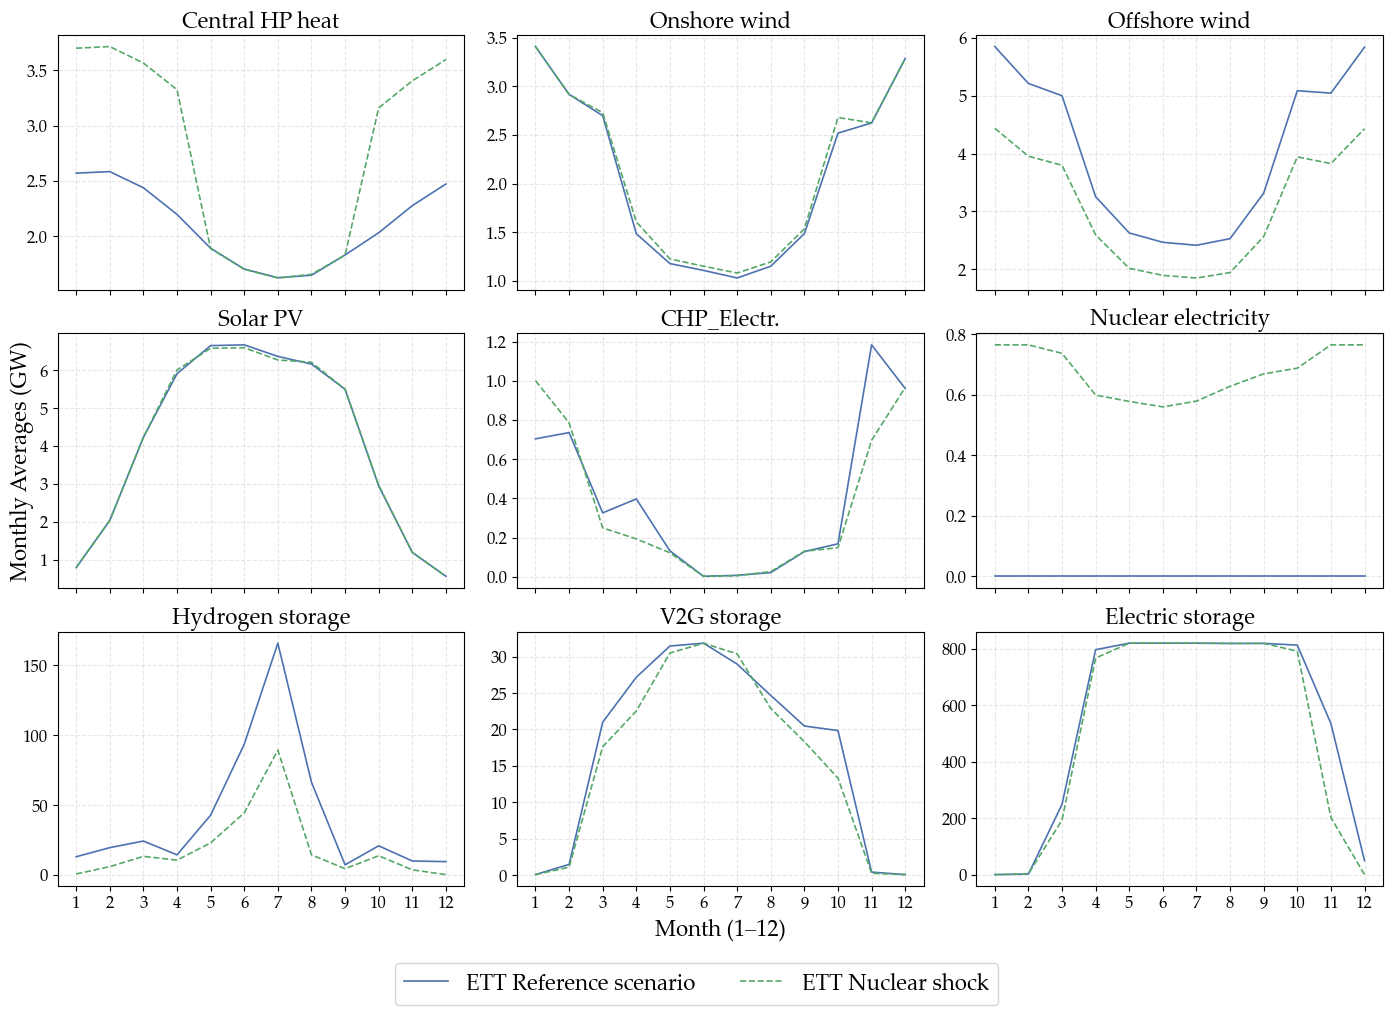

(<Figure size 1400x1000 with 9 Axes>,
 array([<Axes: title={'center': 'Central HP heat'}>,
        <Axes: title={'center': 'Onshore wind'}>,
        <Axes: title={'center': 'Offshore wind'}>,
        <Axes: title={'center': 'Solar PV'}, ylabel='Monthly Averages (GW)'>,
        <Axes: title={'center': 'CHP_Electr.'}>,
        <Axes: title={'center': 'Nuclear electricity'}>,
        <Axes: title={'center': 'Hydrogen storage'}>,
        <Axes: title={'center': 'V2G storage'}, xlabel='Month (1–12)'>,
        <Axes: title={'center': 'Electric storage'}>], dtype=object))

In [28]:
# 2. plot
overview_fig.plot_metrics_months_grid(
    dfs=dfs_months_2,
    plots=var_groups.core_vars,
    case_labels=source_labels,
    tech_labels=var_groups.tech_labels,
    colors=colors,
    nrows=3,
    ncols=3,
    savepath="0_figs/fig2.pdf",  
    dpi=300,
    show=True,
)

## 2. Timeseries by hour

In [19]:
# # 1. build df
# dfs = [build_frames.timeseries_hourly(f) for f in var_groups.shock]

In [20]:
# # 2. plot
# build_frames.plot_metrics(
#     dfs=dfs,
#     plots=var_groups.core_vars + ['Import_Electr.'],
#     # plots=['Nuclear_Electr.'],
#     case_labels=source_labels,
#     tech_labels=var_groups.tech_labels,
#     colors=colors,
# )